In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
from StringIO import StringIO
import zipfile
import glob

### Set file directory

In [2]:
dir = '/Users/kevin/Documents/CMRG/CAI/ekgstodigitize/xpsFiles/'
files = glob.glob(dir+'*.xps')
file = files[3]
print file

/Users/kevin/Documents/CMRG/CAI/ekgstodigitize/xpsFiles/BiV5 Pre-Bi-V ICD NSR.xps


### Extract vector graphic data as xml tree

In [3]:
archive = zipfile.ZipFile(file, 'r')
file_string = archive.read('Documents/1/Pages/1.fpage')
root = ET.fromstring(file_string)

### Find XML entries that contain ECG data

In [4]:
leads = np.zeros(15,dtype=int)
xi = 0
ref_offsets = [253.81,352.12,450.43,548.83,647.14,745.45] 
#xp = 0

for x,actor in enumerate(root):
    if 'Data' in actor.attrib:
        if len(actor.get('Data')) > 1000:
            #print x, len(actor.get('Data').split())
            leads[xi] = x
            xi += 1    
#        if '{StaticResource R0}' in actor.get('Data'):
#            print x, actor.get('RenderTransform')
#            ref_offsets[xp] = actor.get('RenderTransform').split(',')[-1]
#            xp += 1

### Extract ECG data, convert to mV/ms, and plot

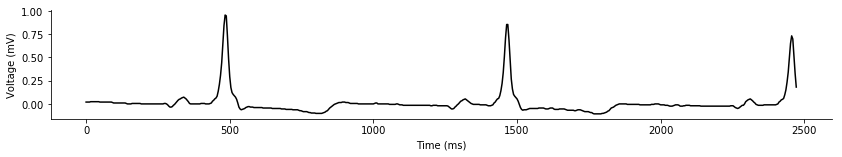

I


In [5]:
#LEAD I
#Extract Data
lead = leads[0]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[0]

#Adjust time axis offset - need to use pulse reference
t_zero = xml_t[0]
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short = np.zeros((len(xml_t),24))
ei = 0
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

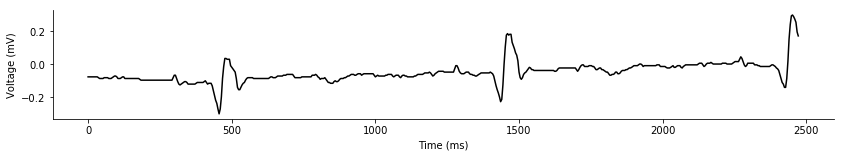

II


In [6]:
#LEAD II
#Extract Data
lead = leads[1]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[1]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

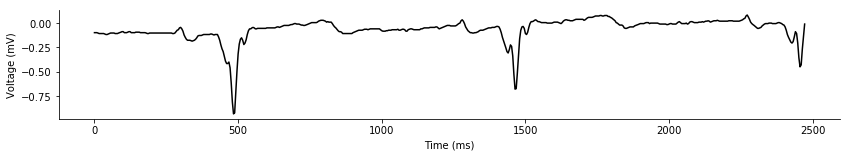

III


In [7]:
#LEAD III
#Extract Data
lead = leads[2]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[2]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

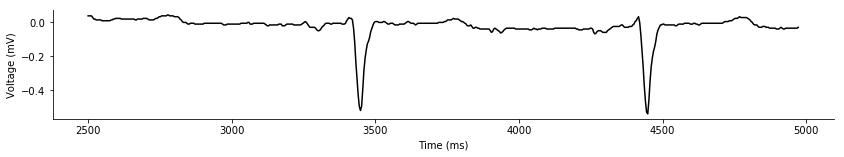

aVR


In [8]:
#LEAD aVR
#Extract Data
lead = leads[3]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[0]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

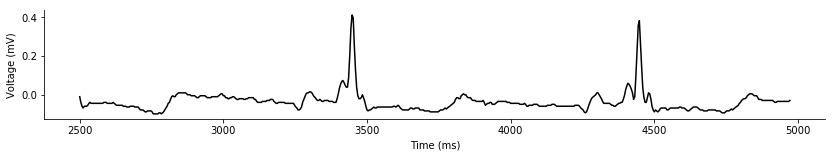

aVL


In [9]:
#LEAD aVL
#Extract Data
lead = leads[4]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[1]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

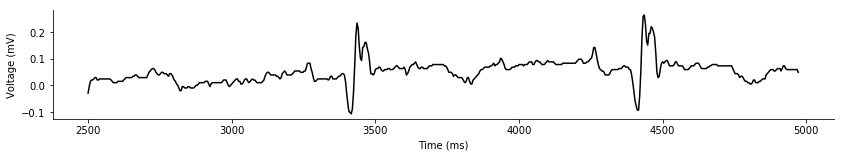

aVF


In [10]:
#LEAD aVF
#Extract Data
lead = leads[5]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[2]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

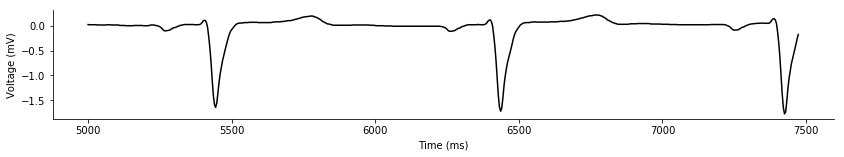

V1


In [11]:
#LEAD V1
#Extract Data
lead = leads[6]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[0]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

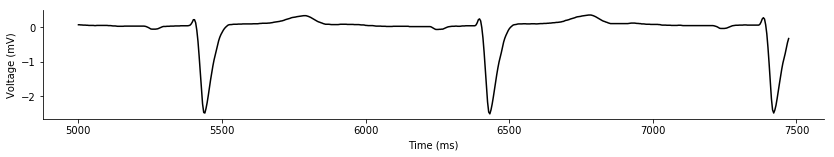

V2


In [12]:
#LEAD V2
#Extract Data
lead = leads[7]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[1]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

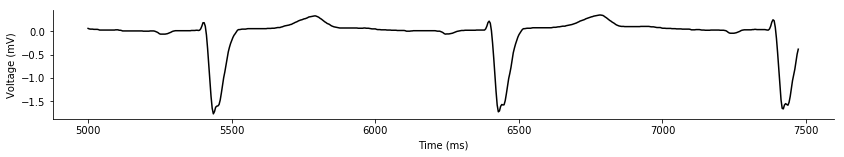

V3


In [13]:
#LEAD V3
#Extract Data
lead = leads[8]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[2]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

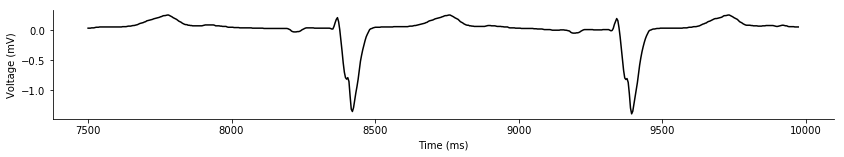

V4


In [14]:
#LEAD V4
#Extract Data
lead = leads[9]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[0]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

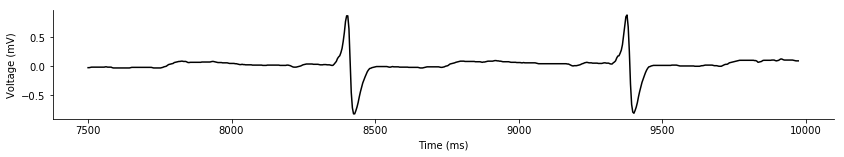

V5


In [15]:
#LEAD V5
#Extract Data
lead = leads[10]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[1]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

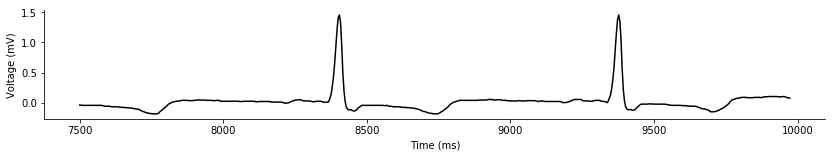

V6


In [16]:
#LEAD V6
#Extract Data
lead = leads[11]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[2]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_short[:,ei] = xml_t
ecg_short[:,ei+1] = xml_v
ei +=2

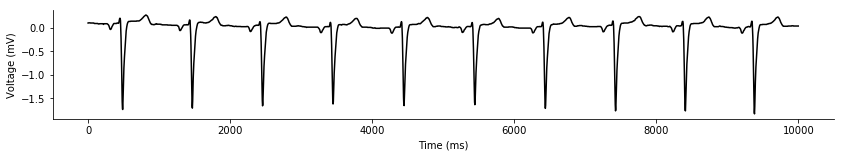

V1


In [17]:
#LEAD V1
#Extract Data
lead = leads[12]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[3]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_long = np.zeros((len(xml_t),24))
ei = 0
ecg_long[:,ei] = xml_t
ecg_long[:,ei+1] = xml_v
ei +=2

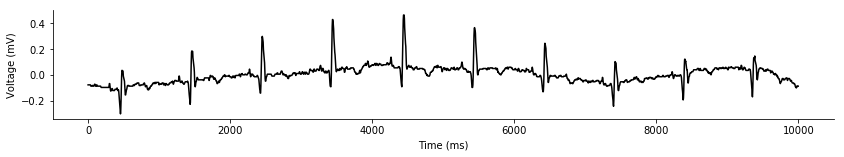

II


In [18]:
#LEAD II
#Extract Data
lead = leads[13]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[4]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_long[:,ei] = xml_t
ecg_long[:,ei+1] = xml_v
ei +=2

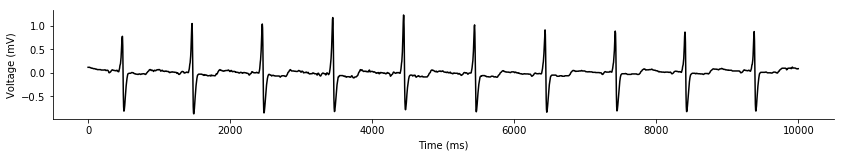

V5


In [19]:
#LEAD V1
#Extract Data
lead = leads[14]
xml_string = root[lead].get('Data')
xml_data = xml_string.replace("L ",'').replace("F1 M ",'').replace('    ','\n').replace(","," ")
num_col = len(xml_data.split('\n')[0].split())
xml_data += ' nan' * (num_col-np.mod(len(xml_data.split()),num_col))
data_xml = np.genfromtxt(StringIO(xml_data))
xml_t = np.delete(data_xml,range(1,num_col,2),1).flatten()
xml_v = np.delete(data_xml,range(0,num_col,2),1).flatten()*-1

#Adjust voltage axis offset - need to use pulse reference
xml_v = xml_v+ref_offsets[5]

#Adjust time axis offset - need to use pulse reference
xml_t = xml_t-t_zero

#Rescale volage axis  - assume from reference pulse
xml_v = xml_v/42.17

#Rescale time axis - assume from reference pulse
xml_t = xml_t*9.96  #200ms/20.08pts

plt.figure(figsize=(14,2))
plt.plot(xml_t,xml_v,'k-')
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

print root[lead+1].get('UnicodeString')
ecg_long[:,ei] = xml_t
ecg_long[:,ei+1] = xml_v
ei +=2

In [20]:
#Save data
fNameOut = dir + file.split('/')[-1].split()[0]
np.savez_compressed(fNameOut, ecg_short=ecg_short, ecg_long=ecg_long)

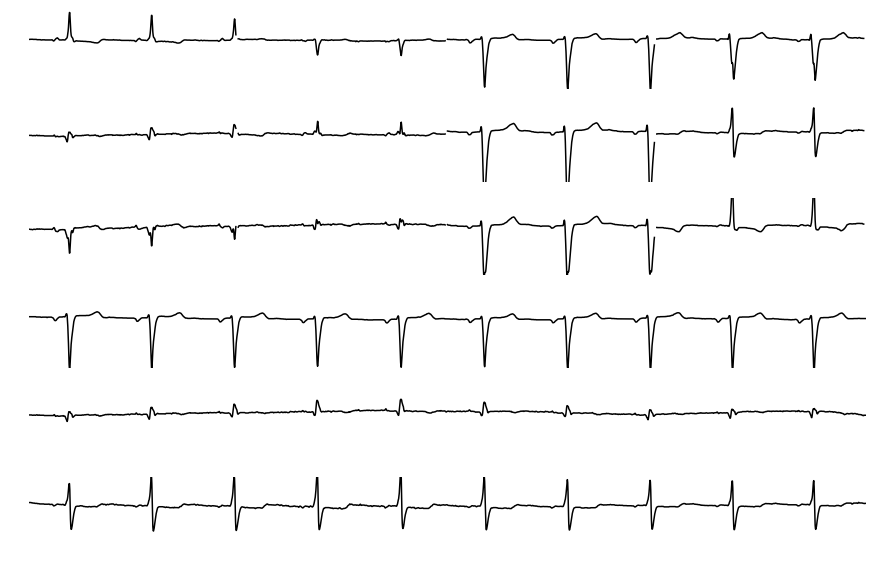

In [21]:
plt.subplots(6, 1,figsize = (15,10))

plt.subplot(6,1,1)
plt.plot(ecg_short[:,0],ecg_short[:,1],'k',ecg_short[:,6],ecg_short[:,7],'k',ecg_short[:,12],ecg_short[:,13],'k',ecg_short[:,18],ecg_short[:,19],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.subplot(6,1,2)
plt.plot(ecg_short[:,2],ecg_short[:,3],'k',ecg_short[:,8],ecg_short[:,9],'k',ecg_short[:,14],ecg_short[:,15],'k',ecg_short[:,20],ecg_short[:,21],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.subplot(6,1,3)
plt.plot(ecg_short[:,4],ecg_short[:,5],'k',ecg_short[:,10],ecg_short[:,11],'k',ecg_short[:,16],ecg_short[:,17],'k',ecg_short[:,22],ecg_short[:,23],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.subplot(6,1,4)
plt.plot(ecg_long[:,0],ecg_long[:,1],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.subplot(6,1,5)
plt.plot(ecg_long[:,2],ecg_long[:,3],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.subplot(6,1,6)
plt.plot(ecg_long[:,4],ecg_long[:,5],'k')
plt.xlim([0,10000])
plt.ylim([-1.7,1.])
plt.axis('off')

plt.show()